<a href="https://colab.research.google.com/github/AbhishekKaushikCV/HCI/blob/main/Transition_matrix_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transition matrix:
## Task:
- To show a transition between the apps( we have 'n' applications)
- Count it along all the other apps
- Store it in the form of a matrix (n*n matrix)

- Name of apps on x and y axis
- For example: if a current app is 'n0' : i have to find how many times there is a switch between n0 to all other apps



In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload the data from scv file

app_data = pd.read_csv('app_data.csv')
app_data

,name,time,timeDate
0,com.huawei.android.launcher,453886603627243,09.08.2019 00:19:53.046
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
2,com.huawei.android.launcher,453933167223590,09.08.2019 00:20:39.609
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
730,ch.ethz.inf.vs.staals.visualattentionrecorder,1194522518849319,23.08.2019 22:18:12.193
731,com.huawei.android.launcher,1194536550817025,23.08.2019 22:18:26.225
732,com.contextlogic.wish,1194537057995671,23.08.2019 22:18:26.733
733,com.huawei.android.launcher,1194725318710747,23.08.2019 22:21:34.993


In [ ]:
# Unique app names used by the participant
unique_apps= app_data.name.unique()

In [ ]:
# Change  the string app name to integer
app_names = app_data.name.unique() # Different app names used in the data
changed_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] # New app names

n_app_data = app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new namesprint(app_data)
n_app_data

,name,time,timeDate
0,0,453886603627243,09.08.2019 00:19:53.046
1,1,453888156162139,09.08.2019 00:19:54.598
2,0,453933167223590,09.08.2019 00:20:39.609
3,2,453933673994423,09.08.2019 00:20:40.116
4,1,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
730,2,1194522518849319,23.08.2019 22:18:12.193
731,0,1194536550817025,23.08.2019 22:18:26.225
732,35,1194537057995671,23.08.2019 22:18:26.733
733,0,1194725318710747,23.08.2019 22:21:34.993


In [ ]:
# Total tranisitions by the participant

transitions = n_app_data.name
transitions = transitions.astype(np.int8) # Convert to type int8

In [ ]:
# Create a transition matrix

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    #for row in M:
        #s = sum(row)
        #if s > 0:
            #row[:] = [f/s for f in row]
    return M

#test:

#t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]


In [ ]:
# Create the tansition matrix
t_matrix = transition_matrix(transitions)
for row in matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [ ]:
# to check the correctness
total=sum(map(sum, t_matrix))
print(total)

734


In [ ]:
# Convert the transition matrix to a numpy array for the heatmap
arr = np.array(t_matrix)

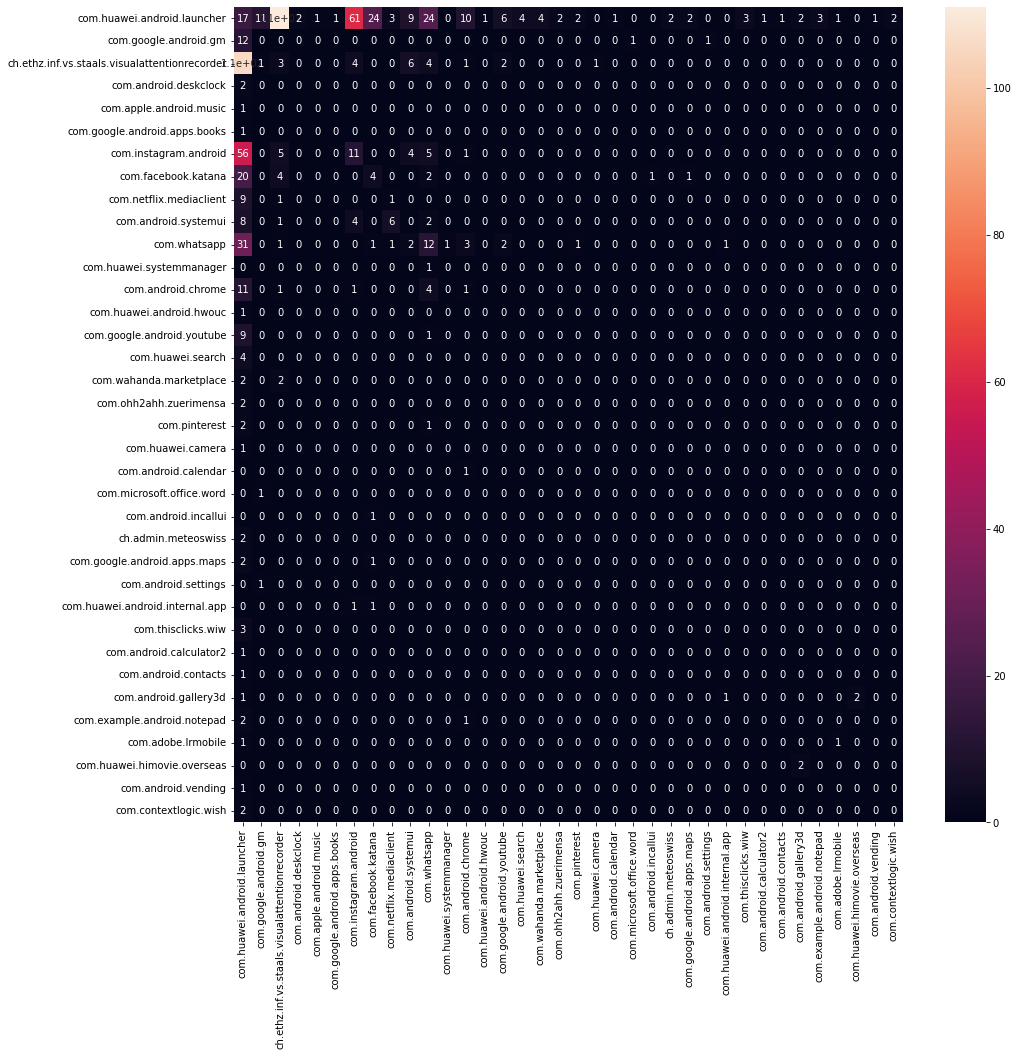

In [ ]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(arr,annot=True,xticklabels=unique_apps,yticklabels=unique_apps)
plt.savefig('transition.png')

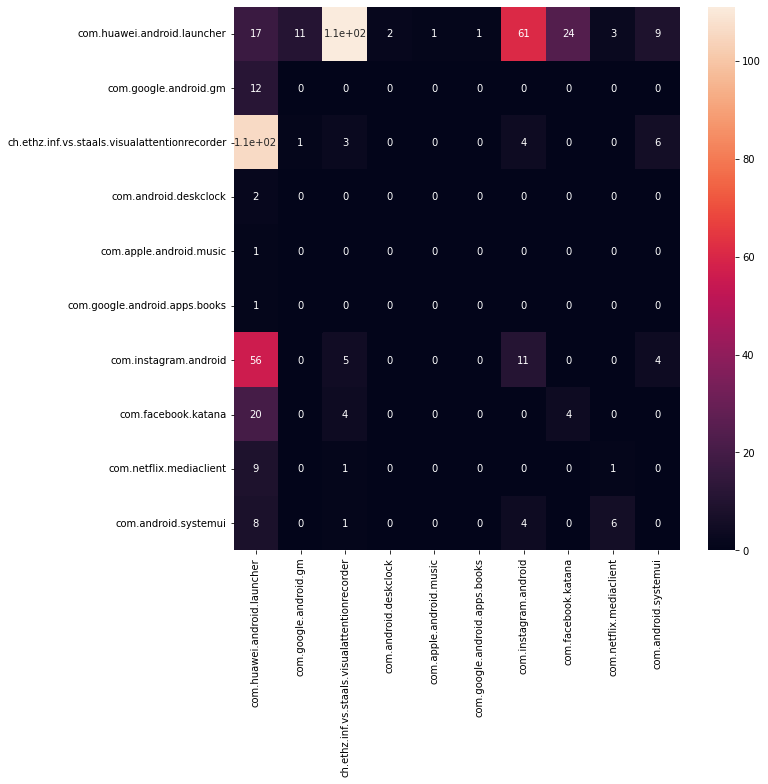

In [ ]:
# Transition matrix of top 10 applications
s_arr = arr[0:10,0:10]
plt.figure(figsize=(10,10))
s_ax = sns.heatmap(s_arr,annot=True,xticklabels=unique_apps[0:10],yticklabels=unique_apps[0:10])
plt.savefig('10_apps_transition.png')

### Mask the android launcher and then create a transition matrix:


In [4]:
# Exclude the android launcher app

mask = app_data['name'].isin(['com.huawei.android.launcher'])
m_app_data = app_data[~mask]
m_app_data

,name,time,timeDate
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
6,com.android.deskclock,453963946712648,09.08.2019 00:21:10.389
8,ch.ethz.inf.vs.staals.visualattentionrecorder,453975674144938,09.08.2019 00:21:22.116
...,...,...,...
726,com.android.vending,1194083282722824,23.08.2019 22:10:52.957
728,com.contextlogic.wish,1194101160776988,23.08.2019 22:11:10.835
730,ch.ethz.inf.vs.staals.visualattentionrecorder,1194522518849319,23.08.2019 22:18:12.193
732,com.contextlogic.wish,1194537057995671,23.08.2019 22:18:26.733


In [ ]:
m_unique_apps = m_app_data.name.unique()

In [ ]:
len(m_unique_apps)

35

In [ ]:
# Change  the string app name to integer
app_names = m_app_data.name.unique() # Different app names used in the data
changed_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34] # New app names

m_app_data = m_app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new names
m_app_data

,name,time,timeDate
1,0,453888156162139,09.08.2019 00:19:54.598
3,1,453933673994423,09.08.2019 00:20:40.116
4,0,453936877236089,09.08.2019 00:20:43.319
6,2,453963946712648,09.08.2019 00:21:10.389
8,1,453975674144938,09.08.2019 00:21:22.116
...,...,...,...
726,33,1194083282722824,23.08.2019 22:10:52.957
728,34,1194101160776988,23.08.2019 22:11:10.835
730,1,1194522518849319,23.08.2019 22:18:12.193
732,34,1194537057995671,23.08.2019 22:18:26.733


In [ ]:
# Total tranisitions by the participant

m_transitions = m_app_data.name
m_transitions = m_transitions.astype(np.int8) # Convert to type int8
m_transitions

1       0
3       1
4       0
6       2
8       1
       ..
726    33
728    34
730     1
732    34
734     1
Name: name, Length: 423, dtype: int8

In [ ]:
# Create the tansition matrix
m_t_matrix = transition_matrix(m_transitions)

for row in m_t_matrix: print(' '.join('{0:0}'.format(x) for x in row))

1 3 1 1 0 2 1 0 0 1 0 2 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
4 15 0 0 0 41 18 3 6 16 0 4 0 6 1 3 2 1 1 0 0 0 2 0 0 0 2 1 0 0 0 0 0 1 1
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 42 0 0 0 18 2 0 4 8 0 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 2 0 0 0 0
0 21 0 0 0 0 5 0 0 4 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 1 0 1 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 8 0 0 0 5 0 6 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
3 11 0 0 0 7 2 1 3 16 1 6 1 2 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2 8 0 0 0 1 0 0 0 4 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 8 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0

In [ ]:
# to check the correctness
total=sum(map(sum, m_t_matrix))
print(total)

422


In [ ]:
# Convert the transition matrix to a numpy array for the heatmap
m_arr = np.array(m_t_matrix)

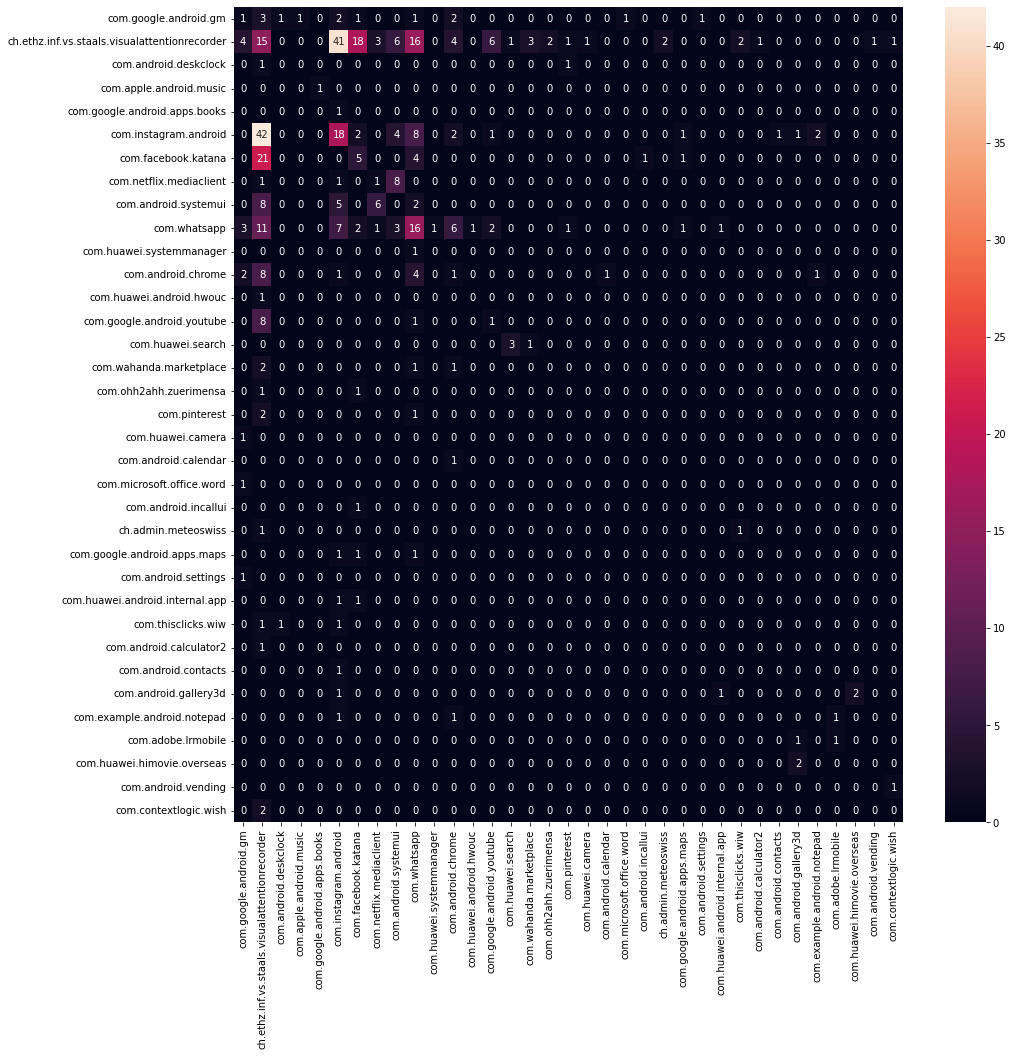

In [ ]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(m_arr,annot=True,xticklabels=m_unique_apps,yticklabels=m_unique_apps)
plt.savefig('Masked_transition.png')

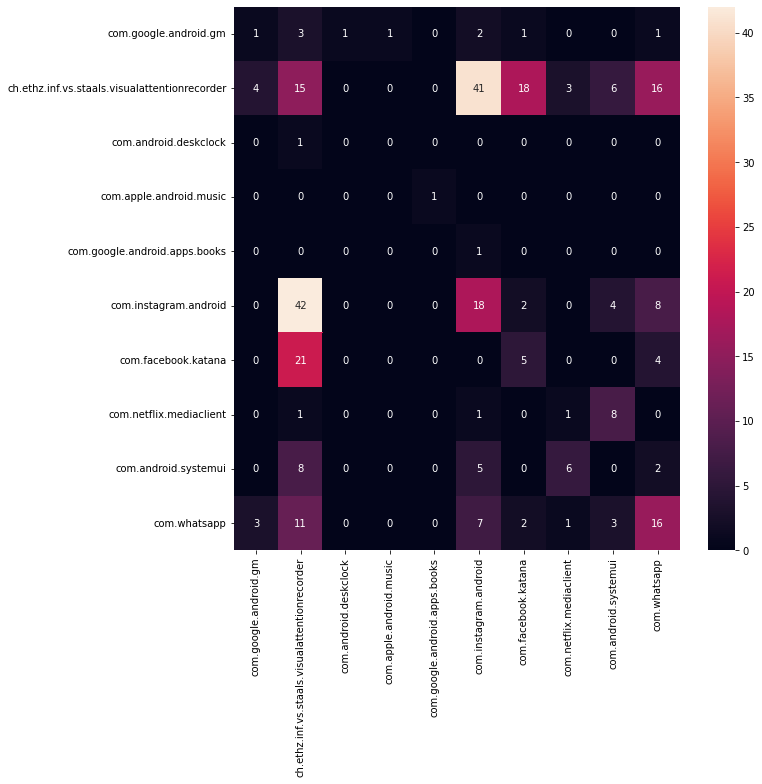

In [ ]:
# Transition matrix of top 10 applications
m_s_arr = m_arr[0:10,0:10]
plt.figure(figsize=(10,10))
s_ax = sns.heatmap(m_s_arr,annot=True,xticklabels=m_unique_apps[0:10],yticklabels=m_unique_apps[0:10])
plt.savefig('m_10_apps_transition.png')

### How to get the transitions of top 10 used apps?

In [8]:
# Sort the dataframe acoording to the number of occurence of value in a column

df = m_app_data['name'].value_counts(ascending=False).reset_index()
df

,index,name
0,ch.ethz.inf.vs.staals.visualattentionrecorder,129
1,com.instagram.android,82
2,com.whatsapp,56
3,com.facebook.katana,32
4,com.android.systemui,21
5,com.android.chrome,18
6,com.google.android.gm,14
7,com.netflix.mediaclient,11
8,com.google.android.youtube,10
9,com.android.gallery3d,4
